# Estimation Statistics - (Effect Size)

In [2]:
import pandas     as pd
import numpy      as np
from numpy.random import randn
from numpy.random import seed
from numpy        import mean
from numpy        import var
from math         import sqrt
from scipy.stats  import pearsonr
np.set_printoptions(precision=3,suppress=True)
seed(1)  # seed random number generator
import matplotlib.pyplot as plt

#### Statistical hypothesis tests report on the likelihood of the observed results given an assumption, such as:
- No association between variables.
- No diﬀerence between groups.

Hypothesis tests make no judgement on the size of the eﬀect if the association or diﬀerence is statistically signiﬁcant.

Therefore there is a need for standard ways of calculating and reporting a result.

Eﬀect size approaches refer to a suite of statistical tools.
- For quantifying the size of an eﬀect in the results of experiments.
- Used to complement the results from statistical hypothesis tests.

The eﬀect size describes the magnitude of a treatment or diﬀerence between two samples.
- A hypothesis test can comment on whether the diﬀerence between samples is the result of chance or is real
- Whereas an eﬀect size puts a number on how much the samples diﬀer.

"*Measuring the size of an eﬀect is a big part of applied machine learning, and in fact, research in general. I am sometimes asked, what do researchers do? The short answer is that we estimate the size of eﬀects. No matter what phenomenon we have chosen to study we essentially spend our careers thinking up new and better ways to estimate eﬀect magnitudes.*"
— Page 3, The Essential Guide to Eﬀect Sizes: Statistical Power, Meta-Analysis, and the Interpretation of Research Results, 2010.

#### Two main classes of techniques used to quantify the magnitude of eﬀects:
- Association
    - The degree to which two samples change together.
    - Including calculations of correlation, such as the Pearson’s correlation coeﬃcient, and the r2 coeﬃcient of determination.
    - They may quantify the linear or monotonic way that observations in two samples change together.
        - Linear: Represented by a straight line on a graph; involving or exhibiting directly proportional change in two related quantities.
        - Monotonic: (function or quantity) varying in such a way that it either never decreases or never increases.
- Diﬀerence
    - The degree to which two samples are diﬀerent.
    - Including methods such as Cohen’s d statistic that provide a standardized measure for how the means of two populations diﬀer.
    - They seek a quantiﬁcation for the magnitude of diﬀerence between observations in two samples.

"*An eﬀect can be the result of a treatment revealed in a comparison between groups (e.g., treated and untreated groups, as in A/B testing) or it can describe the degree of association between two related variables (e.g., treatment dosage and health).*"
— Page 4, The Essential Guide to Eﬀect Sizes: Statistical Power, Meta-Analysis, and the Interpretation of Research Results, 2010.

Eﬀect size on Wikipedia. https://en.wikipedia.org/wiki/Effect_size


## -----------------------------------------------------------------------------------

### calculate the pearson's correlation between two variables

It is a unit-free eﬀect size measure, that can be interpreted in a standard way, as follows:
- -1.0: Perfect negative relationship.
- -0.7: Strong negative relationship
- -0.5: Moderate negative relationship
- -0.3: Weak negative relationship
- 0.0: No relationship.
- 0.3: Weak positive relationship
- 0.5: Moderate positive relationship
- 0.7: Strong positive relationship
- 1.0: Perfect positive relationship.


The Pearson’s correlation coeﬃcient can be calculated in Python using the pearsonr() SciPy function.

The example below demonstrates the calculation of the Pearson’s correlation coeﬃcient to quantify the size of the association between two samples of random Gaussian numbers where one sample has a strong relationship with the second.

In [3]:
# prepare data (10,000) observations in each dataset
data1 = 10 * randn(10000) + 50
data2 = data1 + (10 * randn(10000) + 50)

# load both data samples into a DataFrame
df = pd.DataFrame(data = {"Sample_1":data1,"Sample_2":data2})

Number of observations in each data sample: 10000


,Sample_1,Sample_2
0,66.243454,115.018715
1,43.882436,96.164134
2,44.718282,91.195231
3,39.270314,80.964779
4,58.654076,106.043178
5,26.984613,78.678155
6,67.448118,124.184349
7,42.387931,89.115915
8,53.190391,100.137399
9,47.506296,102.754950


Sample 1 variance: 99.76729288445284
sample 2 variance: 203.15238380321267

 Mean of each sample:
   50.09772656699116
   100.19208070146186

 Standard deviation of each sample:
   9.988357867259905
   14.253153468731496


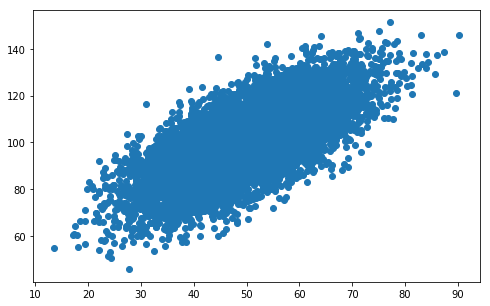

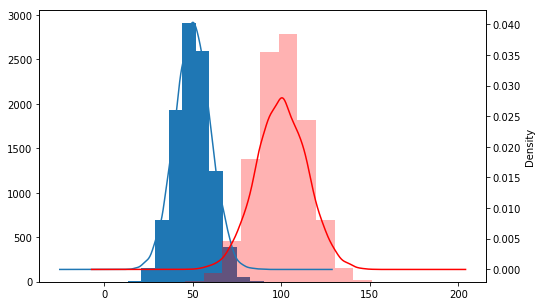

In [4]:
print("Number of observations in each data sample: " + str(len(df)))
display(df.head(10))

# Returns the variance of the sample observations.
# A measure of the spread of a distribution.
s1 = var(df.Sample_1, ddof=1)
s2 = var(df.Sample_2, ddof=1)
print("Sample 1 variance: " + str(s1))
print("sample 2 variance: " + str(s2))

print("\n Mean of each sample:")
print("   " + str(df.Sample_1.mean()))
print("   " + str(df.Sample_2.mean()))
print("\n Standard deviation of each sample:")
print("   " + str(df.Sample_1.std()))
print("   " + str(df.Sample_2.std()))

# Scatter Plot
fig = plt.figure(figsize=(8,5))
plt.scatter(df.Sample_1, df.Sample_2)

# Comparative Histograms with Kernel Density Estimation plot
fig = plt.figure(figsize=(8,5))

ax = fig.add_subplot(1,1,1)
_ = ax.hist(df.Sample_1)
_ = ax.hist(df.Sample_2, color='red', alpha=.3)

ax1 = ax.twinx()
df.Sample_1.plot(kind='kde', ax=ax1)
df.Sample_2.plot(kind='kde', ax=ax1, color='red')
plt.show()
hide_toggle()

In [5]:
# calculate pearson's correlation
corr, _ = pearsonr(df.Sample_1, df.Sample_2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.712


#### Above example:
- Contrives two samples of random gaussian numbers where one sample has a strong relationship with the other.
- Displays a scatter plot of the the linear relationship between the two data samples.
- Displays comparative histograms with kernel density estimation (KDE) plots.
- Calculates and displays the Pearson’s correlation between the two data samples.
- The correlation eﬀect shows a strong positive relationship between the samples.

# -----------------------------------------------------------------------------------

#### coeﬃcient of determination
- Another very popular method for calculating the association eﬀect size is the r-squared measure, or r2, also called the coeﬃcient of determination.
- It summarizes the proportion of variance in one variable explained by the other.

### Calculate Diﬀerence Eﬀect Size
- The diﬀerence between groups is often referred to as the d family of eﬀect size methods.
- Name comes from the a common method for calculating the diﬀerence between the mean value of groups, called Cohen’s d.
- Cohen’s d measures the diﬀerence between the mean from two Gaussian-distributed variables.
- It is a standard score that summarizes the diﬀerence in terms of the number of standard deviations.

Because the score is standardized, there is a table for the interpretation of the result, summarized as:

| Effect Size | Measurment |
| ----------- |:----------:|
| Small       | d = 0.20   |
| Medium      | d = 0.50   |
| Large       | d = 0.80   |

The Cohen’s d calculation is not provided in Python; however, it can be calculated manually.
#### The calculation of the diﬀerence between the mean of two samples is as follows:

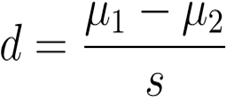

- Where d is the Cohen’s d.
- µ1 is the mean of the first sample.
- µ2 is the mean of the second sample.
- s is the pooled standard deviation of both samples.

#### The pooled standard deviation for two independent samples can be calculated as follows:

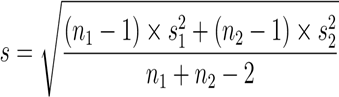

- Where s is the pooled standard deviation.
- n1 and n2 are the sizes of the ﬁrst sample and second samples.
- s2/1 and s2/2 are the variance for the ﬁrst and second samples.
- The subtractions are the adjustments for the number of degrees of freedom.

### calculate the cohen's d between two samples

- The function below will calculate the Cohen’s d measure for two samples of real-valued variables.
- The NumPy functions mean() and var() are used to calculate the sample mean and variance respectively.

The example below calculates the Cohen’s d measure for two samples of random Gaussian variables with diﬀering means.

The samples (data1 and data2) are contrived such that:
- The means are diﬀerent by one half standard deviation.
- And both samples have the same standard deviation.

In [6]:
# called function to calculate cohen's d for independent samples
def cohend(d1, d2):
    # calculate the size of samples
    n1, n2 = len(d1), len(d2)
    # calculate the variance of the samples
    s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
    # calculate the pooled standard deviation
    s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    # calculate the means of the samples
    u1, u2 = mean(d1), mean(d2)
    # calculate the effect size
    return (u1 - u2) / s

In [7]:
# prepare data
# The means are diﬀerent by one half standard deviation.
# And both samples have the same standard deviation.
data1 = 10 * randn(10000) + 60
data2 = 10 * randn(10000) + 55

Number of observations in each data sample: 10000


,Sample_1,Sample_2
0,40.684361,58.860550
1,58.395739,50.008477
2,51.677805,67.864876
3,57.938884,51.477866
4,70.262549,77.429013
5,69.699638,81.998492
6,57.731903,64.311028
7,58.895975,50.239333
8,53.992676,49.525259
9,71.341459,50.360915


Sample 1 variance: 99.2013781032029
sample 2 variance: 100.544252102572

 Mean of each sample (The means are diﬀerent by one half standard deviation):
Sample 1: 59.85396479137986
Sample 2: 55.15915441392111

 Standard deviation of each sample (both samples have practically the same standard deviation):
Sample 1: 9.959988860596326
Sample 2: 10.027175679251462


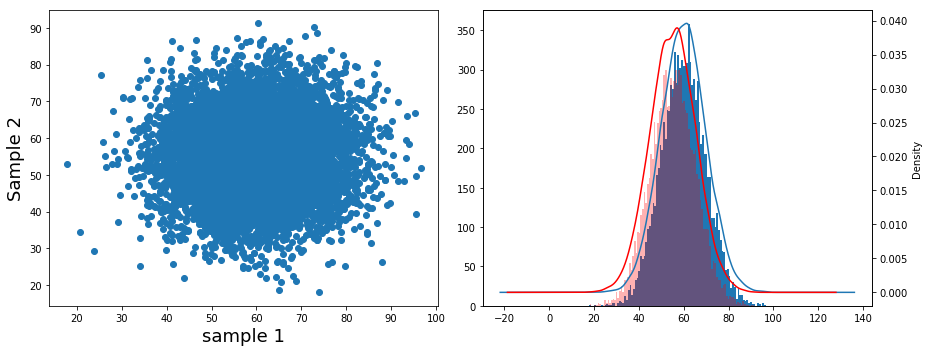

In [8]:
# load both data samples into a DataFrame
df2 = pd.DataFrame(data = {"Sample_1":data1,"Sample_2":data2})
print("Number of observations in each data sample: " + str(len(df)))
display(df2.head(10))

# Returns the variance of the sample observations.
# A measure of the spread of a distribution.
s1 = var(df2.Sample_1, ddof=1)
s2 = var(df2.Sample_2, ddof=1)
print("Sample 1 variance: " + str(s1))
print("sample 2 variance: " + str(s2))

print("\n Mean of each sample (The means are diﬀerent by one half standard deviation):")
print("Sample 1: " + str(df2.Sample_1.mean()))
print("Sample 2: " + str(df2.Sample_2.mean()))
print("\n Standard deviation of each sample (both samples have practically the same standard deviation):")
print("Sample 1: " + str(df2.Sample_1.std()))
print("Sample 2: " + str(df2.Sample_2.std()))

# Create a figure with 1x2 subplot and make the left subplot active
fig = plt.figure(figsize=(13,5))

#---------------------------------------------------------------------
# Create a figure in a 2x2 subplot making the upper-left subplot active
plt.subplot(1,2,1)
plt.scatter(df2.Sample_1, df2.Sample_2)
plt.xlabel("sample 1", fontsize=18)
plt.ylabel("Sample 2",  fontsize=18)

# --------------------------------------------------------------------
# Create a figure in a 2x2 subplot making the upper-right subplot active
ax = fig.add_subplot(1,2,2)
_ = ax.hist(df2.Sample_1,bins=100)
_ = ax.hist(df2.Sample_2,bins=100, color='red', alpha=.3)
ax1 = ax.twinx()
df2.Sample_1.plot(kind='kde', ax=ax1)
df2.Sample_2.plot(kind='kde', ax=ax1, color='red')

# ---------------------------------------------------------------------
# Use plt.tight_layout() to improve the spacing between subplots
plt.tight_layout()
plt.show()

hide_toggle()

In [9]:
# calculate cohen's d
d = cohend(df2.Sample_1, df2.Sample_2)
print('Cohens d: %.3f' % d)

Cohens d: 0.470


#### Above example:
- Contrives two samples, such that: both samples have the same SD and the means are different by one half SD.
- Displays a scatter plot showing no linear relationship between the two data samples.
- Displays comparative histograms with kernel density estimation (KDE) plots.
- Calculates and displays the Cohen’s d eﬀect size.
- As anticipated, the diﬀerence between the means is one half of one SD, interpreted as a medium eﬀect size.

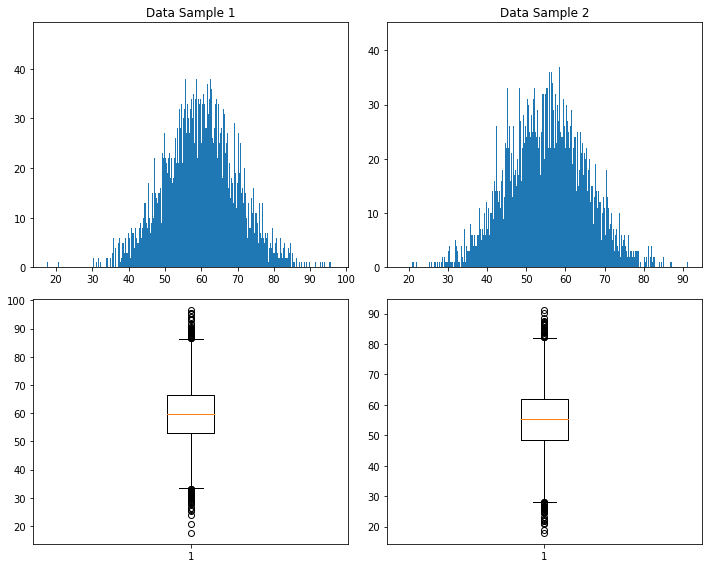

In [10]:
# Create a figure with 1x2 subplot and make the left subplot active
fig = plt.figure(figsize=(10,8))

#---------------------------------------------------------------------
# Create a figure in a 2x2 subplot making the upper-left subplot active
plt.subplot(2,2,1)
plt.hist(data1,bins=1000)
plt.title('Data Sample 1')

# --------------------------------------------------------------------
# Create a figure in a 2x2 subplot making the upper-right subplot active
plt.subplot(2,2,2)
plt.hist(data2,bins=1000)
plt.title('Data Sample 2')

#---------------------------------------------------------------------
# Create a figure in a 2x2 subplot making the lower-left subplot active
plt.subplot(2,2,3)
plt.boxplot(data1)

# --------------------------------------------------------------------
# Create a figure in a 2x2 subplot making the upper-right subplot active
plt.subplot(2,2,4)
plt.boxplot(data2)

# ---------------------------------------------------------------------
# Use plt.tight_layout() to improve the spacing between subplots
plt.tight_layout()
plt.show()
hide_toggle()

## -----------------------------------------------------------------------------------

Two other popular methods for quantifying the diﬀerence eﬀect size are:
- Odds Ratio. Measures the odds of an outcome occurring from one treatment compared to another.
- Relative Risk Ratio. Measures the probabilities of an outcome occurring from one treatment compared to another.

## ------------------------------------------------------------------------------------

In [1]:
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}

            {js_hide_current}
        </script>

        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)